In [977]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import matplotlib
import plotly.express as px
import seaborn as sns 

# Importing data 

In [978]:
raw_data=pd.read_csv("./Futures_Resources_Data.csv")
raw_data.head()

,Date,CL=F_closing_price,BZ=F_closing_price,GC=F_closing_price,SI=F_closing_price,NG=F_closing_price,ZC=F_closing_price,ZW=F_closing_price,ZS=F_closing_price,HG=F_closing_price,PL=F_closing_price,PA=F_closing_price
0,29/10/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402.700012,NaN
1,30/10/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.299988,NaN
2,31/10/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404.200012,NaN
3,03/11/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.500000,NaN
4,04/11/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.700012,NaN


In [979]:
raw_data.columns

Index(['Date', 'CL=F_closing_price', 'BZ=F_closing_price',
       'GC=F_closing_price', 'SI=F_closing_price', 'NG=F_closing_price',
       'ZC=F_closing_price', 'ZW=F_closing_price', 'ZS=F_closing_price',
       'HG=F_closing_price', 'PL=F_closing_price', 'PA=F_closing_price'],
      dtype='object')

In [980]:
#Rename columns 
df=raw_data.rename(columns={'CL=F_closing_price':"wti_oil", 'BZ=F_closing_price':"brent_oil",
       'GC=F_closing_price':"gold", 'SI=F_closing_price':"soyabin", 'NG=F_closing_price':'natural_gas',
       'ZC=F_closing_price':'corn', 'ZW=F_closing_price':'platinum', 'ZS=F_closing_price':'Copper',
       'HG=F_closing_price':'wheat', 'PL=F_closing_price':'petrileum', 'PA=F_closing_price':'palladium'})

In [981]:
df.describe()
df.isnull().sum()
df[df["Date"].str[:-2]==97].count()

Date           0
wti_oil        0
brent_oil      0
gold           0
soyabin        0
natural_gas    0
corn           0
platinum       0
Copper         0
wheat          0
petrileum      0
palladium      0
dtype: int64

In [982]:
def f(x):
    last_two = x[-2:]
    if last_two in ["97", "98", "99"]:
        return "19"+last_two
    else:
        return "20"+last_two
df["Year"]=df["Date"].apply(lambda x:f(x))

df.head(2)

,Date,wti_oil,brent_oil,gold,soyabin,natural_gas,corn,platinum,Copper,wheat,petrileum,palladium,Year
0,29/10/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402.700012,NaN,1997
1,30/10/97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.299988,NaN,1997


<Axes: xlabel='Year'>

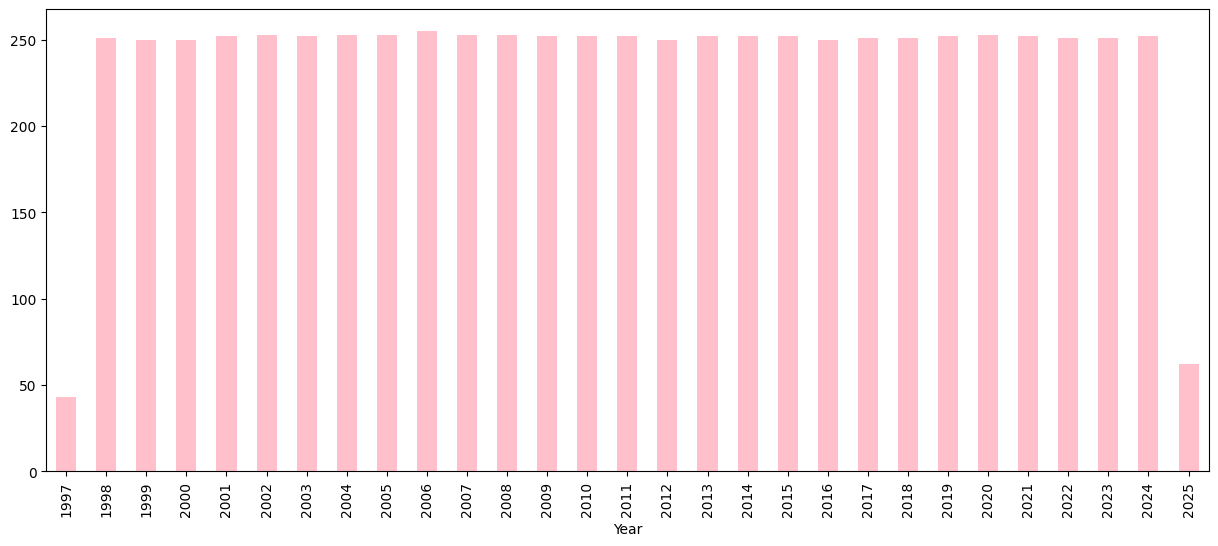

In [983]:
df["Year"].value_counts().sort_index(ascending=True).plot(kind="bar",figsize=(15,6),color="pink")


In [984]:
#Removing 1997 and 2025
df.drop(df[df["Year"].isin(["1997","2025"])].index,axis=0,inplace=True)
df.drop(columns="Date",inplace=True)

<Axes: >

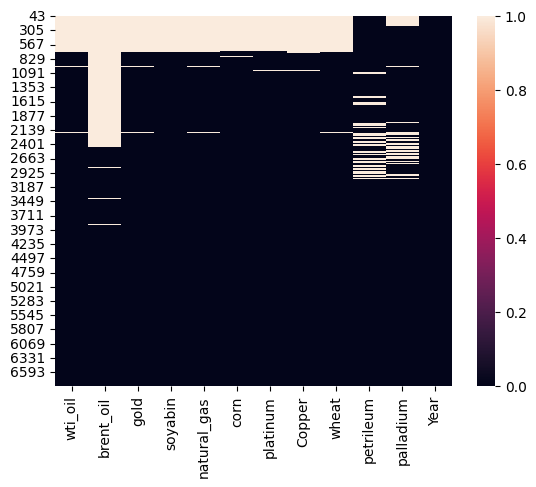

In [985]:
sns.heatmap(df.isnull())

In [986]:
grouped_df=df.groupby("Year")[['wti_oil', 'brent_oil', 'gold', 'soyabin', 'natural_gas',
       'corn', 'platinum', 'Copper', 'wheat', 'petrileum', 'palladium']].sum().reset_index()


In [987]:
px.bar(grouped_df,x="Year",y=['wti_oil', 'brent_oil', 'gold', 'soyabin', 'natural_gas',
       'corn', 'platinum', 'Copper', 'wheat', 'petrileum', 'palladium']) 

In [988]:
df.isnull().sum()
df.drop_duplicates()
df.loc[df.duplicated()]
df.loc[df.isna().index]

,wti_oil,brent_oil,gold,soyabin,natural_gas,corn,platinum,Copper,wheat,petrileum,palladium,Year
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.000000,NaN,1998
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.399994,NaN,1998
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.600006,NaN,1998
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.500000,NaN,1998
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.100006,NaN,1998
...,...,...,...,...,...,...,...,...,...,...,...,...
6838,70.099998,73.580002,2620.000000,29.974001,3.946,448.50,534.75,975.25,4.0495,958.500000,938.299988,2024
6839,69.620003,73.260002,2638.800049,30.047001,3.715,453.75,541.00,988.00,4.0720,952.200012,906.400024,2024
6840,70.599998,74.169998,2617.199951,29.655001,3.514,454.00,546.50,980.00,4.0625,917.500000,893.599976,2024
6841,70.989998,74.389999,2606.100098,29.106001,3.936,452.25,548.25,982.00,4.0455,902.400024,894.200012,2024


In [989]:
df.describe()

,wti_oil,brent_oil,gold,soyabin,natural_gas,corn,platinum,Copper,wheat,petrileum,palladium
count,6115.000000,4333.000000,6106.000000,6108.000000,6112.000000,6119.000000,6131.000000,6111.000000,6111.000000,6091.000000,6146.000000
mean,64.660721,78.626700,1161.029331,17.046670,4.428022,410.793471,537.870780,1006.031501,2.761919,999.309473,839.058257
std,25.064798,24.330393,580.555001,8.499672,2.240940,160.078084,182.627417,332.025925,1.120792,389.901392,628.842111
min,-37.630001,19.330000,255.100006,4.026000,1.482000,174.750000,233.500000,418.500000,0.604000,336.399994,148.500000
25%,45.639999,60.060001,631.750015,11.478750,2.776000,310.625000,403.500000,779.500000,2.093500,800.599976,350.449997
50%,63.689999,76.739998,1233.900024,16.749000,3.784500,375.250000,517.250000,979.750000,2.990500,944.599976,698.049988
75%,82.814999,100.320000,1615.424988,22.685250,5.596500,501.875000,651.000000,1295.625000,3.594500,1238.549988,992.299988
max,145.289993,146.080002,2788.500000,48.584000,15.378000,831.250000,1425.250000,1771.000000,5.119000,2251.100098,2985.399902


In [990]:
from sklearn.impute import SimpleImputer


In [991]:
columns=['wti_oil', 'brent_oil', 'gold', 'soyabin', 'natural_gas',
       'corn', 'platinum', 'Copper', 'wheat', 'petrileum', 'palladium']

impute=SimpleImputer(strategy="mean")
impute.fit(df)
df=pd.DataFrame(impute.transform(df))
df=df.rename(columns={0:"wti_oil",1:'brent_oil',2:'gold',3:'soyabin',4:"natural_gas",5:"corn",6:"platinum",7:"Copper",8:'wheat',9:"petoleum",10:"palladium",11:"Year"})

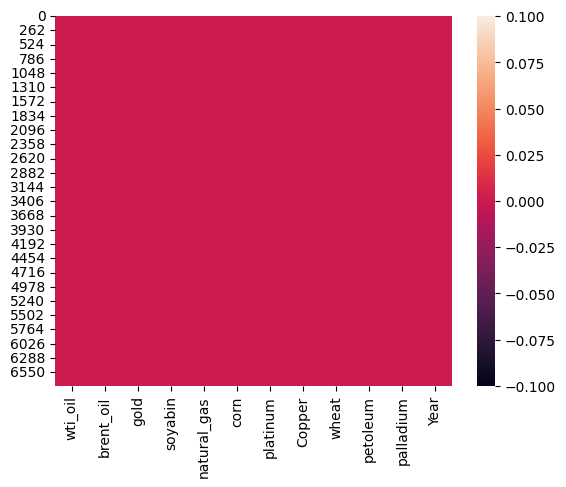

In [992]:

sns.heatmap(df.isnull())

final_grouped_df=df.groupby("Year")[["wti_oil",'brent_oil','gold','soyabin',"natural_gas","corn","platinum","Copper",'wheat',"petoleum","palladium"]].mean().reset_index()

In [993]:
final_grouped_df.head(2)

,Year,wti_oil,brent_oil,gold,soyabin,natural_gas,corn,platinum,Copper,wheat,petoleum,palladium
0,1998.0,64.660721,78.6267,1161.029331,17.04667,4.428022,410.793471,537.87078,1006.031501,2.761919,373.705180,693.776006
1,1999.0,64.660721,78.6267,1161.029331,17.04667,4.428022,410.793471,537.87078,1006.031501,2.761919,373.766001,359.703200


<Axes: >

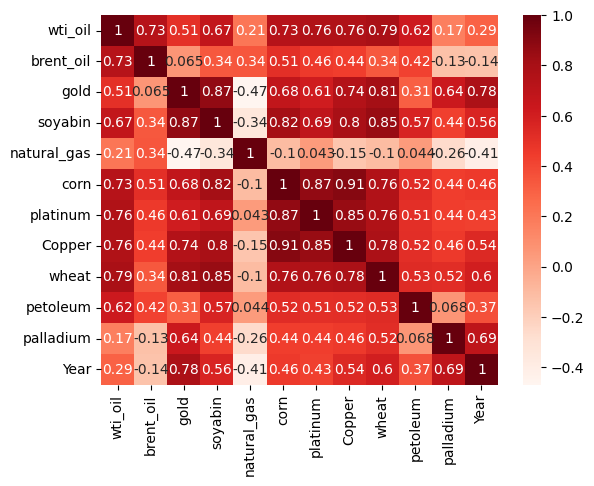

In [994]:
sns.heatmap(df.corr(),cmap="Reds",annot=True)

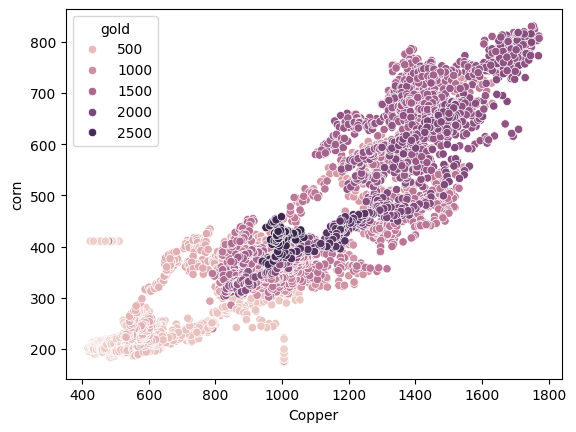

In [995]:

sns.scatterplot(data=df,x="Copper",y="corn",hue="gold")
plt.show()

In [996]:
px.scatter(df,x="platinum",y="corn")

In [997]:
px 

<module 'plotly.express' from 'c:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\plotly\\express\\__init__.py'>

Text(0, 0.5, 'Mean price')

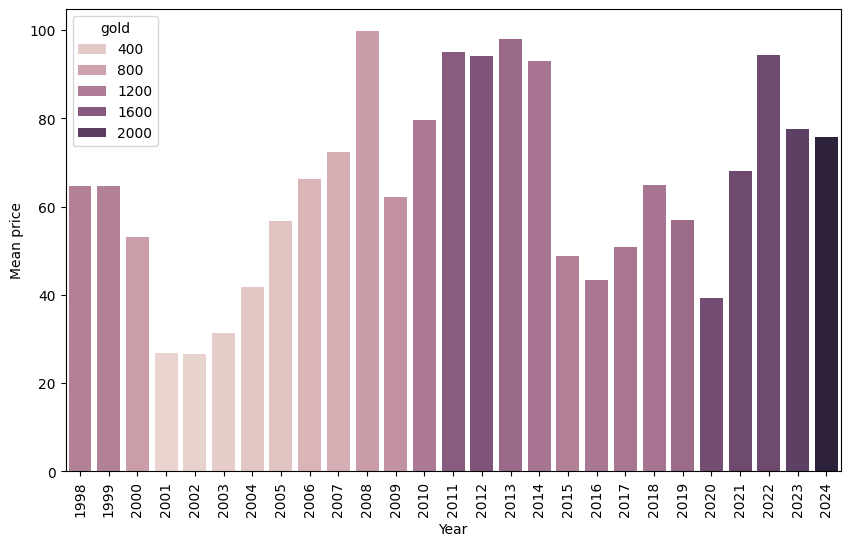

In [998]:
final_grouped_df["Year"]=final_grouped_df["Year"].astype(int)
plt.figure(figsize=(10,6))
sns.barplot(data=final_grouped_df,x="Year",y="wti_oil",hue="gold")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Mean price")

Text(0, 0.5, 'Mean price of petroleum')

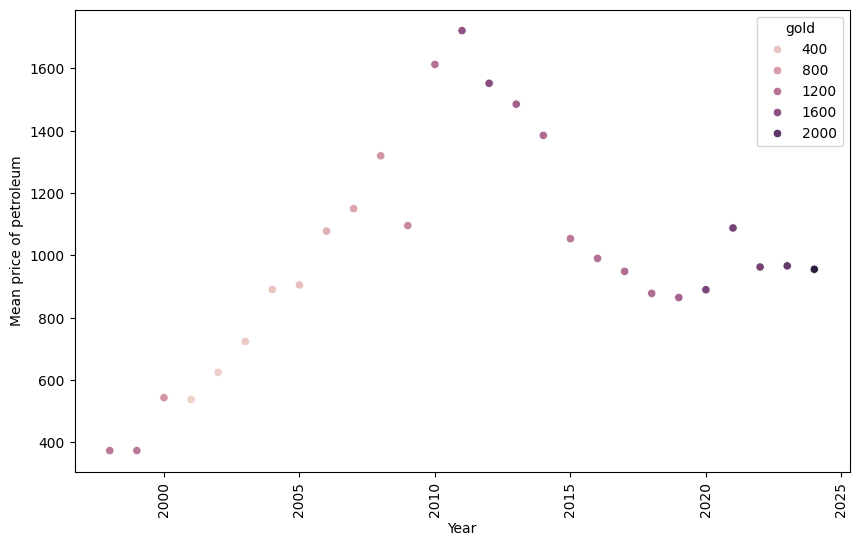

In [999]:
final_grouped_df["Year"]=final_grouped_df["Year"].astype(int)
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_grouped_df,x="Year",y="petoleum",hue="gold")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Mean price of petroleum")

In [1000]:

plt.figure(figsize=(10,6))
ax=px.bar(final_grouped_df.iloc[10:],x="Year",y="brent_oil")
ax.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

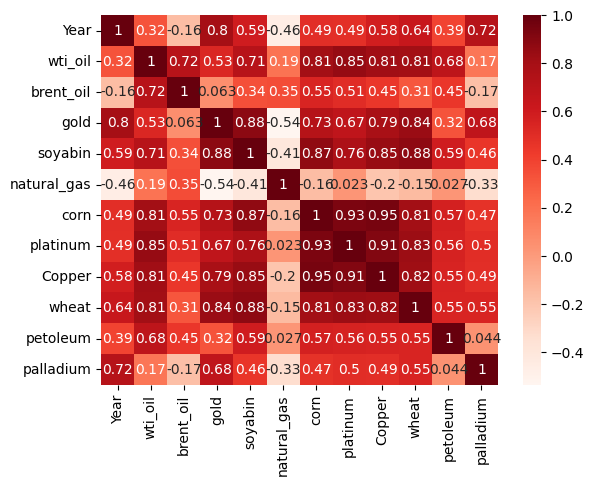

In [1001]:
sns.heatmap(final_grouped_df.corr(),cmap="Reds",annot=True)

In [1014]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1003]:
df.loc[3575]

wti_oil         106.160004
brent_oil       124.120003
gold           1683.300049
soyabin          33.542999
natural_gas       2.302000
corn            643.750000
platinum        633.000000
Copper         1321.500000
wheat             3.760500
petoleum       1625.800049
palladium       683.750000
Year           2012.000000
Name: 3575, dtype: float64

In [1004]:
df.select_dtypes(include=["number"])
df["Year"]=df["Year"].astype(int)
df.dtypes

wti_oil        float64
brent_oil      float64
gold           float64
soyabin        float64
natural_gas    float64
corn           float64
platinum       float64
Copper         float64
wheat          float64
petoleum       float64
palladium      float64
Year             int64
dtype: object

In [1005]:
model=LinearRegression()


In [1006]:
model=LinearRegression()
df.head(4)

,wti_oil,brent_oil,gold,soyabin,natural_gas,corn,platinum,Copper,wheat,petoleum,palladium,Year
0,64.660721,78.6267,1161.029331,17.04667,4.428022,410.793471,537.87078,1006.031501,2.761919,368.000000,839.058257,1998
1,64.660721,78.6267,1161.029331,17.04667,4.428022,410.793471,537.87078,1006.031501,2.761919,364.399994,839.058257,1998
2,64.660721,78.6267,1161.029331,17.04667,4.428022,410.793471,537.87078,1006.031501,2.761919,356.600006,839.058257,1998
3,64.660721,78.6267,1161.029331,17.04667,4.428022,410.793471,537.87078,1006.031501,2.761919,363.500000,839.058257,1998


In [1007]:
#Selecting input and target columns 
numerical_cols=list(df.columns)
target_cols=["platinum"]
input_cols=['wti_oil', 'brent_oil', 'gold', 'soyabin', 'natural_gas', 'corn','wheat', 'petoleum', 'palladium', 'Year',"Copper"]

In [1008]:
#Lets create a function for common input and target cols 
def target_input(input,target):
    fit_data=model.fit(df[input],df[target])
    prediction=model.predict(df[input])
    prediction_df=pd.DataFrame(prediction,columns=["Predicted Platinum Price"])
    target_df=pd.DataFrame(df[target])
    return prediction_df,target_df
predictions, actual_targets = target_input(input_cols,target_cols)
target_input(input_cols,target_cols)


(      Predicted Platinum Price
 0                   553.012398
 1                   552.740042
 2                   552.149940
 3                   552.671954
 4                   552.566038
 ...                        ...
 6795                544.061098
 6796                548.249063
 6797                546.143592
 6798                550.846389
 6799                558.528752
 
 [6800 rows x 1 columns],
        platinum
 0     537.87078
 1     537.87078
 2     537.87078
 3     537.87078
 4     537.87078
 ...         ...
 6795  534.75000
 6796  541.00000
 6797  546.50000
 6798  548.25000
 6799  551.50000
 
 [6800 rows x 1 columns])

In [1009]:
marged_dataframe=pd.merge(predictions,actual_targets,left_index=True,right_index=True).reset_index()
marged_dataframe.head()

,index,Predicted Platinum Price,platinum
0,0,553.012398,537.87078
1,1,552.740042,537.87078
2,2,552.149940,537.87078
3,3,552.671954,537.87078
4,4,552.566038,537.87078


In [1010]:
predictions.tail()

,Predicted Platinum Price
6795,544.061098
6796,548.249063
6797,546.143592
6798,550.846389
6799,558.528752


In [1011]:
actual_targets.tail()

,platinum
6795,534.75
6796,541.00
6797,546.50
6798,548.25
6799,551.50


In [1016]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=marged_dataframe["index"], y=marged_dataframe["Predicted Platinum Price"], mode="markers", name="Predicted Platinum"))
fig.add_trace(go.Scatter(x=marged_dataframe["index"], y=marged_dataframe["platinum"], mode="markers", name="Actual Platinum"))
fig.update_layout(title_text="Scatter Plot of Predicted Copper Price and Platinum Prices", showlegend=True)
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9180\1521195238.py:1: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



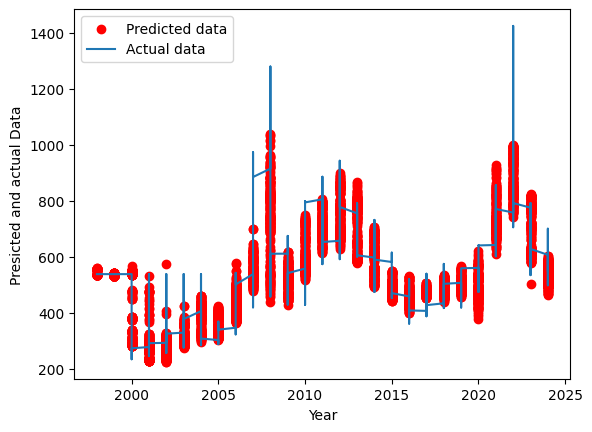

In [1029]:
plt.scatter(df["Year"],predictions["Predicted Platinum Price"],color="red",cmap="Reds")
plt.plot(df["Year"],actual_targets["platinum"])
plt.xlabel("Year")
plt.ylabel("Presicted and actual Data")
plt.legend(["Predicted data","Actual data"])

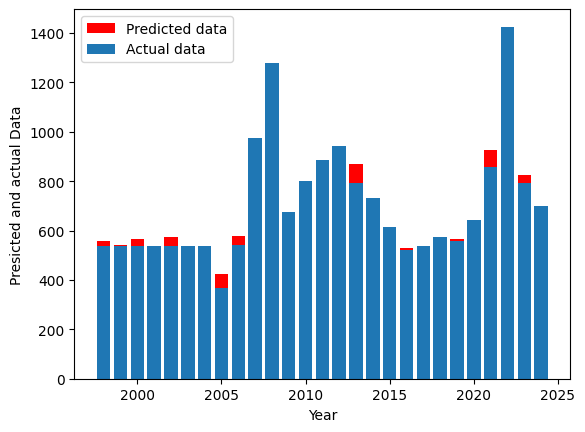

In [1028]:
plt.bar(df["Year"],predictions["Predicted Platinum Price"],color="red")
plt.bar(df["Year"],actual_targets["platinum"])
plt.xlabel("Year")
plt.ylabel("Presicted and actual Data")
plt.legend(["Predicted data","Actual data"])

In [1060]:
def loss_calculatilon(predictions,actual_targets):
    rms=np.sqrt(np.mean(np.square(predictions["Predicted Platinum Price"])-np.square(actual_targets["platinum"])))
    return rms

loss=loss_calculatilon(predictions,actual_targets)

C:\Users\USER\AppData\Local\Temp\ipykernel_9180\1629466632.py:2: RuntimeWarning:

invalid value encountered in sqrt



In [1048]:
predictions["Predicted Platinum Price"].iloc[6797]
actual_targets["platinum"].iloc[6797]

loss["Loss"].iloc[6797]

np.float64(nan)